## 新闻

- [佩洛西與蔡英文舉行記者會（直播） － BBC News 中文](https://www.youtube.com/watch?v=t2-_iAx89hA&ab_channel=BBCNews%E4%B8%AD%E6%96%87)- [商务部新闻发言人就暂停天然砂对台湾地区出口答记者问](http://www.mofcom.gov.cn/article/syxwfb/202208/20220803337886.shtml)
- [海关总署动植物检疫司 进出口食品安全局发布关于暂停台湾地区柑橘类水果和冰鲜白带鱼、冻竹荚鱼输入大陆的通知](http://www.customs.gov.cn/customs/xwfb34/302425/4494504/index.html)

## 数据

- （推荐）海关总署数据在线查询平台: http://43.248.49.97/ ，[（该平台权威性证明）](http://www.customs.gov.cn/haikou_customs/605737/fdzdgknr82/605745/3539138/index.html)
- （不推荐，粗度太低了）[海关总署数据统计月报](http://www.customs.gov.cn/customs/302249/zfxxgk/2799825/302274/302277/4185050/index.html)
- 台湾海关数据：https://portal.sw.nat.gov.tw/APGA/GA30

,year,total,china,pct
0,2003,92386.98713,81882.26710,0.886297
1,2004,110570.07924,94408.85727,0.853837
2,2005,156221.51552,135843.31420,0.869556
3,2006,232876.14113,201156.72961,0.863793
4,2007,92641.26114,44510.91956,0.480465
5,2008,107144.16172,59405.53732,0.554445
6,2009,139340.12620,110501.25618,0.793033
7,2010,111597.94272,66080.68502,0.592132
8,2011,107686.91348,52019.92004,0.483066
9,2012,96014.10732,42981.69026,0.447660


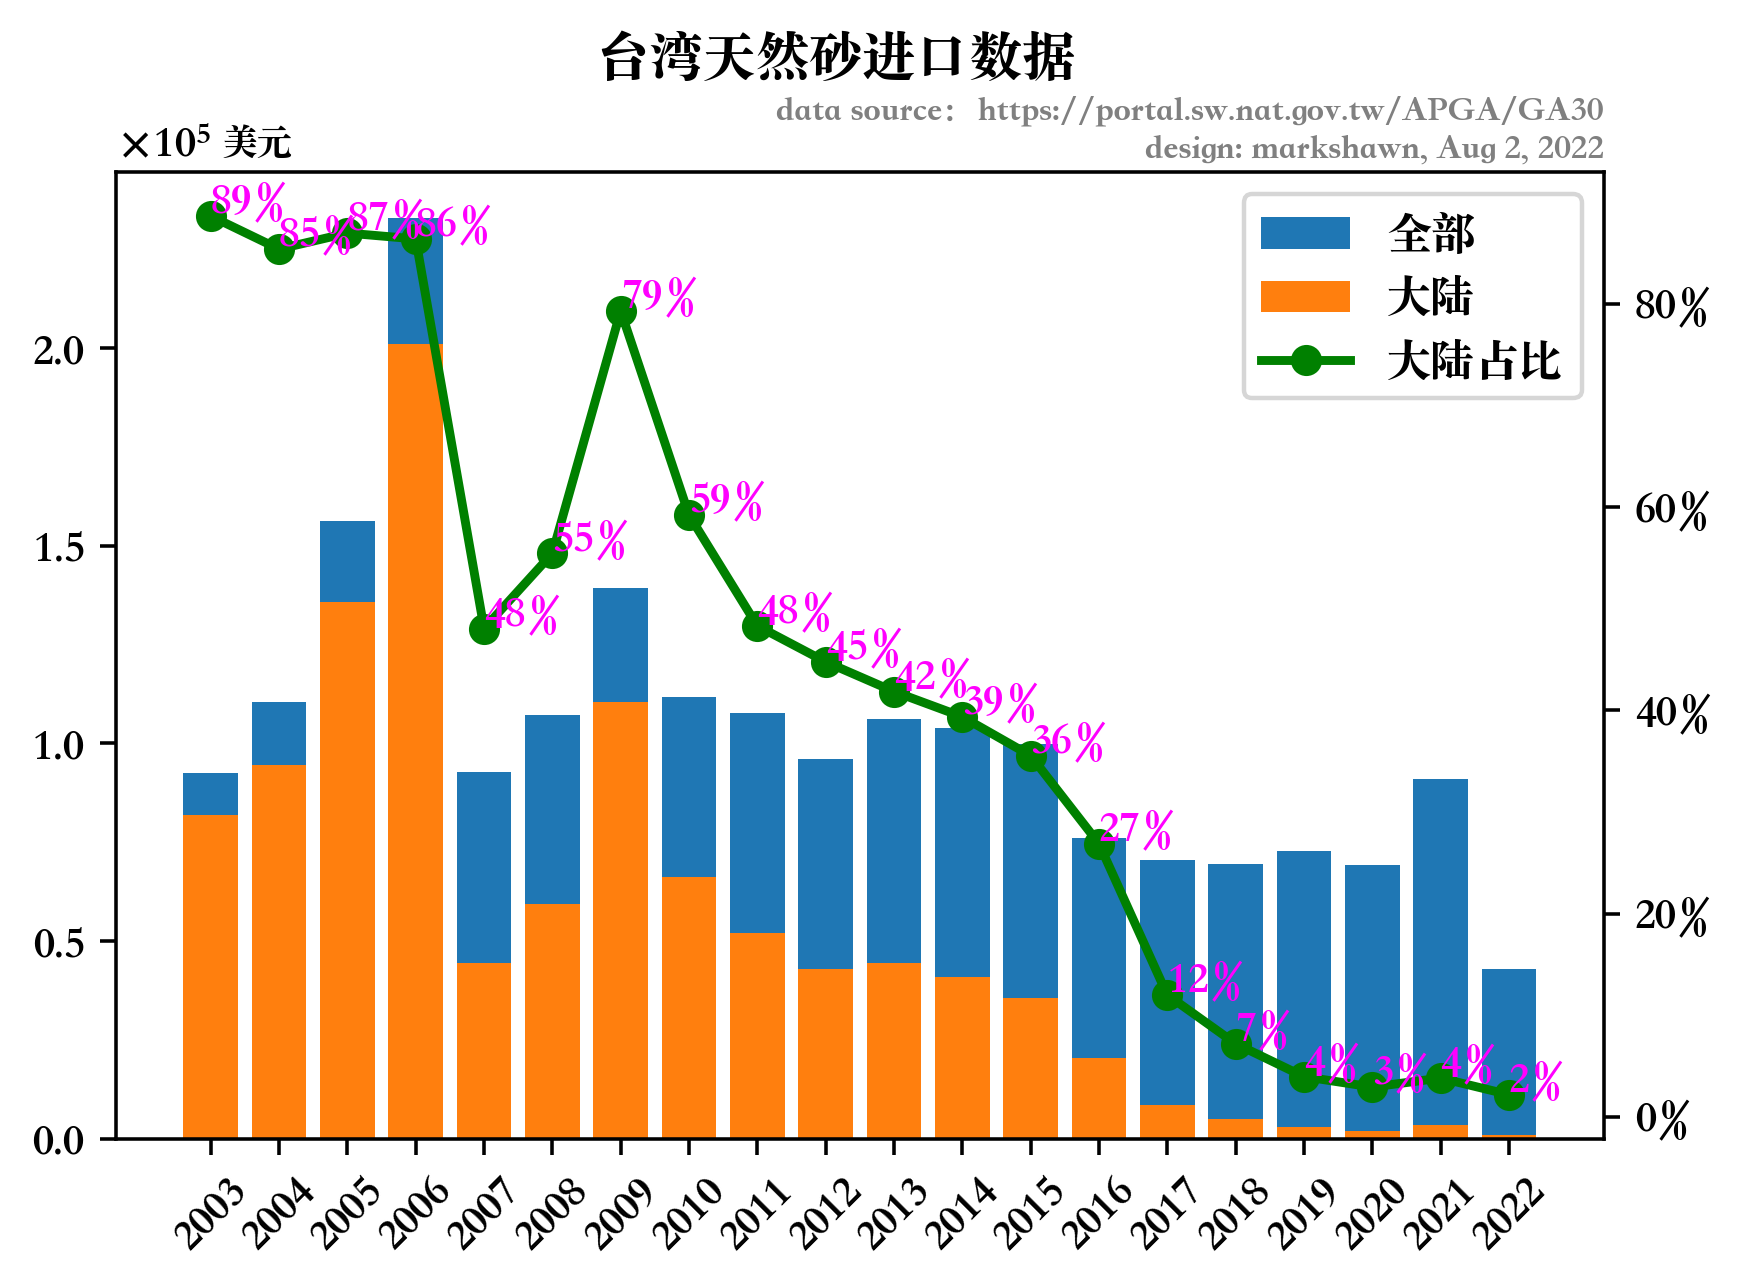

In [9]:
import re

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.ticker import ScalarFormatter, PercentFormatter

plt.rcParams["figure.dpi"] = 320
plt.rcParams['font.sans-serif']=['Songti SC']

### step 1. data fetch

# 台湾海关数据查询网址: https://portal.sw.nat.gov.tw/APGA/GA30
# 参数设置：货品（天然砂）：2505
df = pd.read_excel("~/Downloads/綜合查詢_20220803143014.xls")


### step 2. data wash

def china_with_world(df: pd.DataFrame):
    china = float(df[df['國家'] == '中國大陸']['美元(千元)'])
    total = df['美元(千元)'].sum()
    pct = china / total 
    return pd.Series({
        "total": total,
        'china': china,
        'pct': pct
    })

df['year'] = df['日期'].apply(lambda x: int(re.search(r'\d+', x).group()) + 1912 - 1)
df2 = df.groupby(['year']).apply(china_with_world).reset_index()
display(df2)


### step 3. data visualization

# scientific formatter, ref: https://atmamani.github.io/cheatsheets/matplotlib/matplotlib_2/#Numbers-on-axes-in-scientific-notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 1))  # https://matplotlib.org/3.4.3/api/ticker_api.html#matplotlib.ticker.ScalarFormatter.set_powerlimits

# two kinds draw from dataframe: https://www.statology.org/matplotlib-two-y-axes/
ax1 = host_subplot(111)
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()
ax2.yaxis.set_major_formatter(PercentFormatter(1))

index = df2.year.astype(str)
ax1.bar(index, df2.total, label='全部')
ax1.bar(index, df2.china, label='大陆')

ax2.plot(index, df2.pct, 'g-o', linewidth=2, label='大陆占比')
for i,j in zip(index, df2.pct):
    ax2.annotate(f'{j*100:.0f}%',xy=(i,j), color='magenta')

plt.figtext(.5,.99,'台湾天然砂进口数据', size=12, ha='center', va="top")
plt.figtext(.9,.92,'data source：https://portal.sw.nat.gov.tw/APGA/GA30', size=8, ha='right', color='gray', style='italic')
plt.figtext(.9,.89,'design: markshawn, Aug 2, 2022', size=8, ha='right', color='gray', style='italic')
plt.figtext(.18,.895,'美元', size=8, style='italic')
plt.legend()
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees